In [6]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import numpy as np
import pandas as pd
import random


In [5]:
# Read CSV, parse dates, and set index
csvpath = Path('Resources/Week10-Day2-Activity3-osptx.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

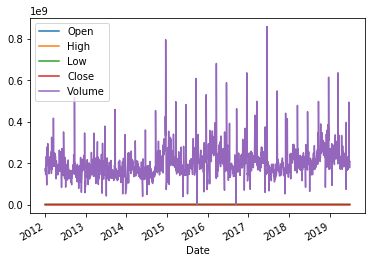

In [7]:
df.plot()

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03 16:00:00,12097.23,12216.76,11955.94,12208.43,162333312
2012-01-04 16:00:00,12189.71,12234.27,12154.04,12226.47,175575328
2012-01-05 16:00:00,12196.24,12253.13,12137.11,12237.40,161562816
2012-01-06 16:00:00,12241.82,12245.99,12148.31,12188.64,144785088
2012-01-09 16:00:00,12194.98,12210.58,12150.68,12196.72,149905296


In [10]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

ADF Statistic: -1.556289
p-value:        0.505505 
Lags used:      1
Critical Values:
('1%', -3.4338349685861806)
('5%', -2.8630794170659684)
('10%', -2.5675895289750503)


False

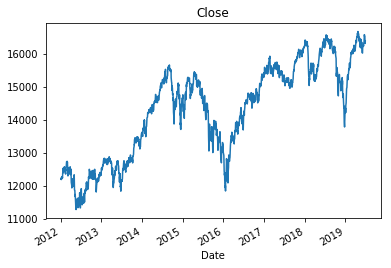

In [11]:
is_stationary(df['Close'])

In [15]:
df['Returns'] = df['Close'].pct_change()

In [16]:
df.dropna(inplace=True)

ADF Statistic: -20.879457
p-value:        0.000000 
Lags used:      4
Critical Values:
('1%', -3.433844279577887)
('5%', -2.8630835276091933)
('10%', -2.567591717680237)


True

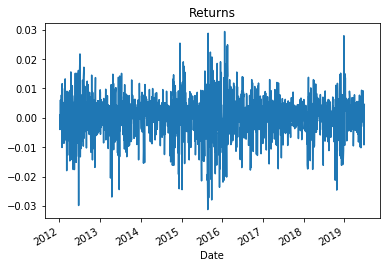

In [18]:
is_stationary(df['Returns'])

In [19]:
from statsmodels.tsa.arima_model import ARMA

In [24]:
model = ARMA(df['Returns'].values, order=(1,1))

In [22]:
model

In [26]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.56361D+00    |proj g|=  1.56073D-02

At iterate    5    f= -3.56361D+00    |proj g|=  2.46736D-04

At iterate   10    f= -3.56361D+00    |proj g|=  3.13842D-03

At iterate   15    f= -3.56361D+00    |proj g|=  2.20712D-05

At iterate   20    f= -3.56361D+00    |proj g|=  2.83951D-04

At iterate   25    f= -3.56361D+00    |proj g|=  3.50004D-03

At iterate   30    f= -3.56361D+00    |proj g|=  2.37144D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


In [27]:
results.forecast(steps=10)

(array([0.00053204, 0.00014079, 0.00018393, 0.00017917, 0.0001797 ,
        0.00017964, 0.00017965, 0.00017965, 0.00017965, 0.00017965]),
 array([0.00685657, 0.00687851, 0.00687878, 0.00687878, 0.00687878,
        0.00687878, 0.00687878, 0.00687878, 0.00687878, 0.00687878]),
 array([[-0.0129066 ,  0.01397067],
        [-0.01334085,  0.01362242],
        [-0.01329822,  0.01366609],
        [-0.01330299,  0.01366134],
        [-0.01330246,  0.01366186],
        [-0.01330252,  0.0136618 ],
        [-0.01330252,  0.01366181],
        [-0.01330252,  0.01366181],
        [-0.01330252,  0.01366181],
        [-0.01330252,  0.01366181]]))

In [28]:
results.forecast(steps=10)[0]

array([0.00053204, 0.00014079, 0.00018393, 0.00017917, 0.0001797 ,
       0.00017964, 0.00017965, 0.00017965, 0.00017965, 0.00017965])

In [29]:
df_results = pd.DataFrame(results.forecast(steps=10)[0])

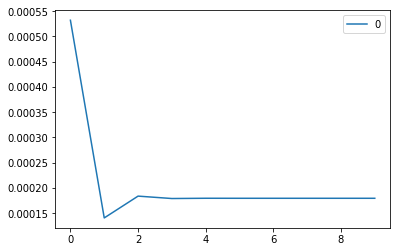

In [30]:
df_results.plot()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1879
Model:                     ARMA(1, 1)   Log Likelihood                6696.018
Method:                       css-mle   S.D. of innovations              0.007
Date:                Mon, 25 Apr 2022   AIC                         -13384.036
Time:                        20:16:15   BIC                         -13361.882
Sample:                             0   HQIC                        -13375.876
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.059      0.289      -0.000       0.001
ar.L1.y       -0.1103      0.278     -0.397      0.692      -0.655       0.435
ma.L1.y        0.1903      0.275      0.693      0.488      -0.348       0.728
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.0686           +0.0000j            9.0686            0.5000
MA.1           -5.2540           +0.0000j            5.2540            0.5000
-----------------------------------------------------------------------------
"""